In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats

def mod_dirichlet(a, K):  # 디리클레분포의 최빈값을 구하는 함수로 sum(a) != K인 경우만 가능
  mod=[]
  for i in a:
    mod.append((i-1)/(sum(a)-K))
  return mod

mod_dirichlet([1,2,3], 3)  # 함수 호출 테스트

[0.0, 0.3333333333333333, 0.6666666666666666]

In [ ]:
추정 * 데이터는 ✵ 또는 ✶ 뿐이다✳ → 베르누이분포
• 데이터는 카테고리 값이어야 한다✳ → 카테고리분포
• 데이터는 ✵과 ✶ 사이의 실수 값이어야 한다✳ → 베타분포
• 데이터는 항상 ✵ 또는 양수이어야 한다✳ → 로그정규분포✱ 감마분포✱
❋분포✱ 카이제곱분포✱ 지수분포✱ 하프코시분포 등
• 데이터가 크기 제한이 없는 실수다✳ → 정규분포 또는 스튜던트 t분포✱ 코시분포✱ 라플라스분포 등

C:\Users\01089\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


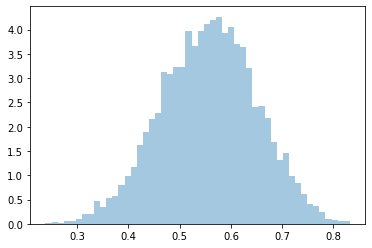

In [3]:

np.random.seed(0)
x= sp.stats.beta(15,12).rvs(10000)
sns.distplot(x, kde= False, norm_hist = True)
plt.show()

In [63]:
모멘트 방법으로 모수를 계산하면 원래의 모수와 비슷한 값을 구할 수 있다✳
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar*(x_bar *(1-x_bar)/s2 -1)
    b= (1 - x_bar)*(x_bar*(1-x_bar)/s2-1)
    return a,b

In [64]:
params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


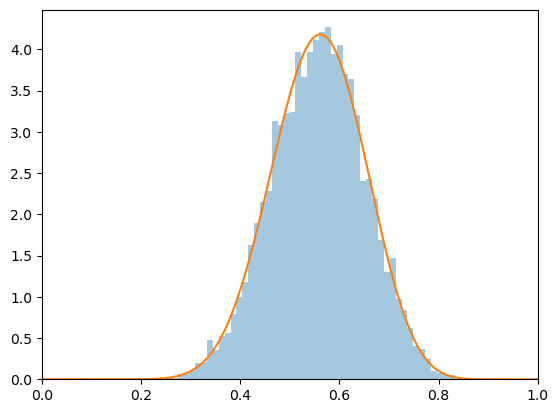

In [69]:
xx= np.linspace(0,1,1000)
sns.distplot(x, kde = False, norm_hist = True)
plt.plot(xx, sp.stats.beta(params[0],params[1]).pdf(xx))
plt.xlim(0,1)
plt.show()

sns.distplot(x, kde = False,norm_True,fit=sp.stats.beta)
plt.xlim(0,1)
plt.show()

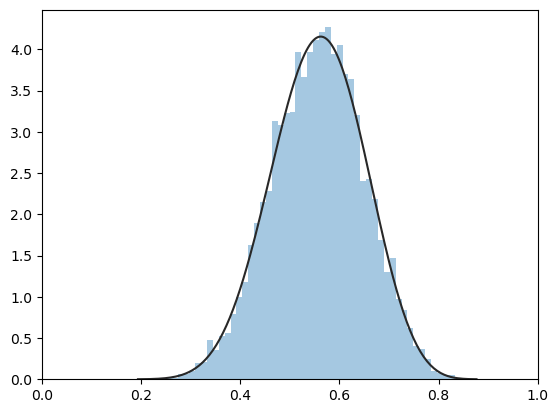

In [27]:
sns.distplot(x, kde = False, norm_hist = True, fit = sp.stats.beta)
plt.xlim(0,1)
plt.show()

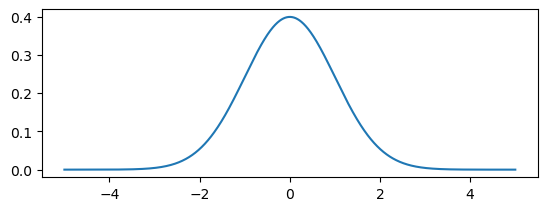

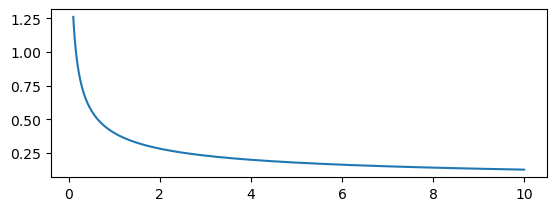

In [28]:
def likehood_mu(mu):
    return sp.stats.norm(loc = mu).pdf(0)
mus = np.linspace(-5,5,1000)
likehood_mu = [likehood_mu(m) for m in mus]
plt.subplot(211)

plt.plot(mus,likehood_mu)
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale = np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1,10,1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s,likelihood_sigma2)
plt.show()

C:\Users\Hoseo\AppData\Local\Temp\ipykernel_5204\4251755659.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax =fig.gca(projection = '3d')


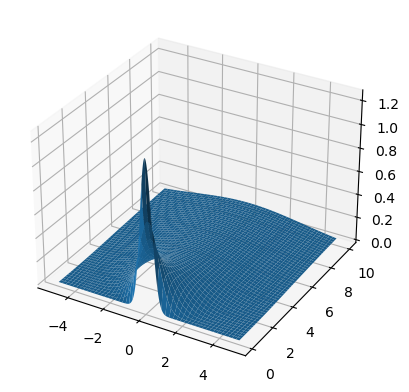

In [32]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU**2/ (2*SIGMA2))/ np.sqrt(2*np.pi*SIGMA2)

fig = plt.figure()
ax =fig.gca(projection = '3d')
ax.plot_surface(MU, SIGMA2, L,linewidth = 0.1)
plt.show()

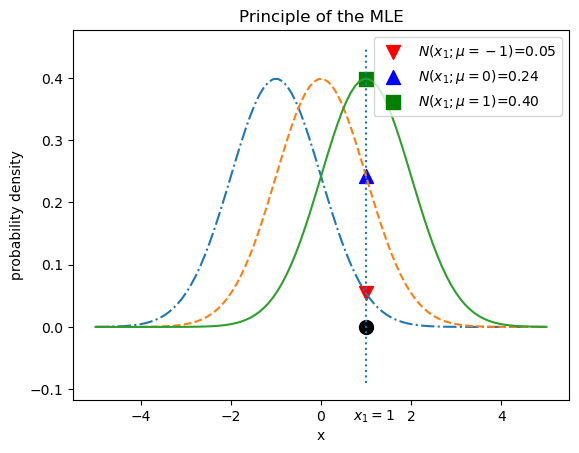

In [46]:
#최대가능도 추정법
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1) 
p2 = sp.stats.norm(loc=0).pdf(1) 
p3 = sp.stats.norm(loc=1).pdf (1)

plt.scatter(1, p1, s=100, c='r', marker='v',label=r"$N(x_1; \mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^',label=r"$N(x_1; \mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s',label=r"$N(x_1; \mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("probability density")
plt.legend()
plt.title("Principle of the MLE")
plt.show()

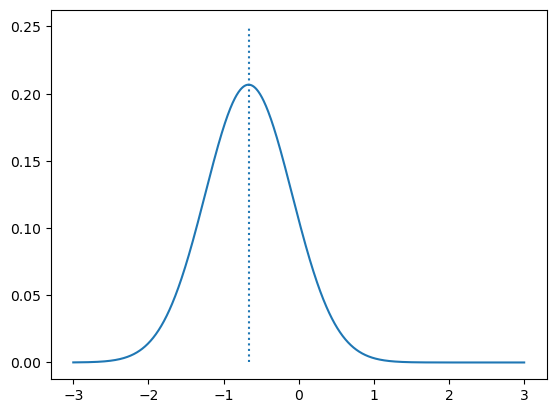

In [48]:
mu= np.linspace(-3,3,1000)
sigma2= 1

def likelihood(mu):
    return (2*np.pi*sigma2)**(3/2)*np.exp(-(3*mu**2+4*mu+10)/(2*sigma2))

li = likelihood(mu)

plt.plot(mu,li)
plt.vlines(-2/3,0,0.25,linestyles = ":")
plt.show()

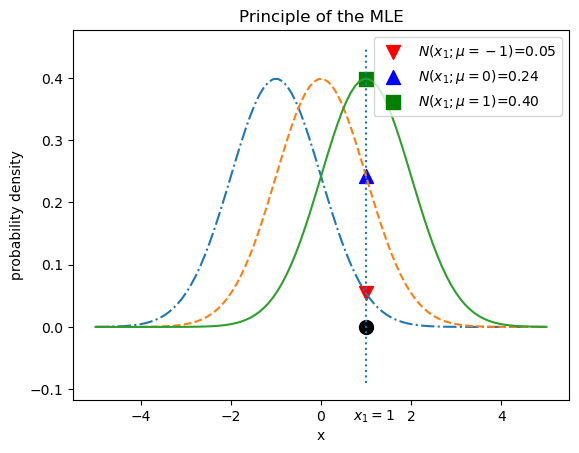

In [53]:
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1) 
p2 = sp.stats.norm(loc=0).pdf(1) 
p3 = sp.stats.norm(loc=1).pdf (1)

plt.scatter(1, p1, s=100, c='r', marker='v',label=r"$N(x_1; \mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^',label=r"$N(x_1; \mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s',label=r"$N(x_1; \mu=1)$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("probability density")
plt.legend()
plt.title("Principle of the MLE")
plt.show()

In [4]:
#11주차 과제 
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfY], axis=1)

C:\Users\01089\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

C:\Users\01089\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

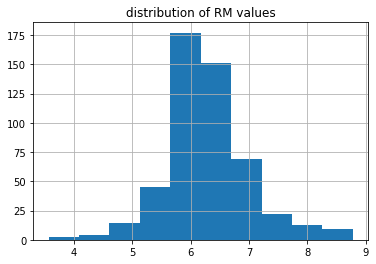

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfY], axis=1)
df['RM'].hist()
plt.title('distribution of RM values')
plt.show()

C:\Users\01089\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

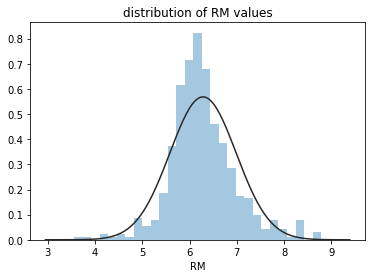

In [6]:
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfY], axis=1)
sns.distplot(df['RM'], kde=False, fit=sp.stats.norm)
plt.title('distribution of RM values')
plt.show()

C:\Users\01089\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

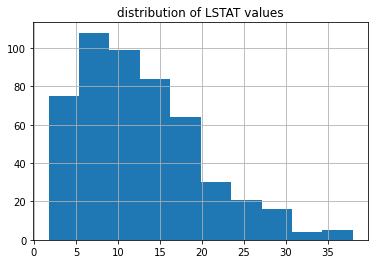

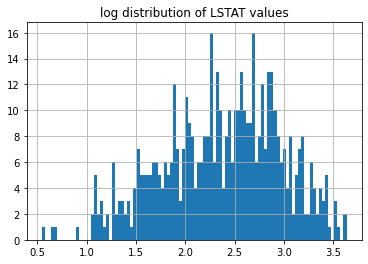

In [10]:
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfY], axis=1)
df['LSTAT'].hist()
plt.title('distribution of LSTAT values')
plt.show()
np.log(df['LSTAT']).hist(bins=100)
plt.title('log distribution of LSTAT values')
plt.show()